# Fuel Consumption CO2

### Simple Linear Regression



Using the following libraries:

* matplotlib
* pyplot
* numpy
* sci-kit learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn import linear_model

# from sklearn import linear_model
# from sklearn.metrics import r2_score

In [3]:
# read dataset from local machine
# path = (r"C:\Users\HPx\Documents\Prog\Coursera\09--Machine Learning with Python\Week 2\FuelConsumptionCo2.csv")

In [2]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()
# df.describe(include = 'all')

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
df.shape

(1067, 13)

In [12]:
# df.rank
# df.index
df.count()

MODELYEAR                   1067
MAKE                        1067
MODEL                       1067
VEHICLECLASS                1067
ENGINESIZE                  1067
CYLINDERS                   1067
TRANSMISSION                1067
FUELTYPE                    1067
FUELCONSUMPTION_CITY        1067
FUELCONSUMPTION_HWY         1067
FUELCONSUMPTION_COMB        1067
FUELCONSUMPTION_COMB_MPG    1067
CO2EMISSIONS                1067
dtype: int64

In [13]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [13]:
series = df[['ENGINESIZE']]
series.tail()

,ENGINESIZE
1062,3.0
1063,3.2
1064,3.0
1065,3.2
1066,3.2


In [15]:
pd.Series('ENGINESIZE')

0    ENGINESIZE
dtype: object

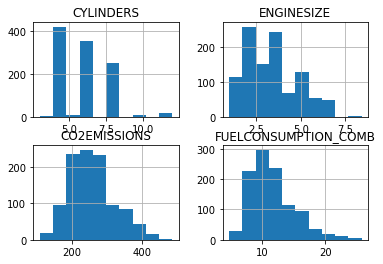

In [16]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

In [17]:
eng_co2 = df[['ENGINESIZE','CO2EMISSIONS']]
eng_co2

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


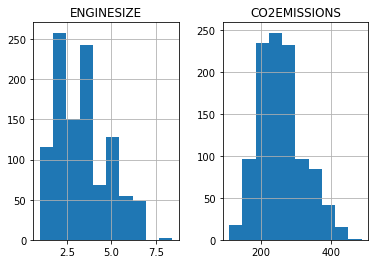

In [18]:
eng_co2.hist()
plt.show()

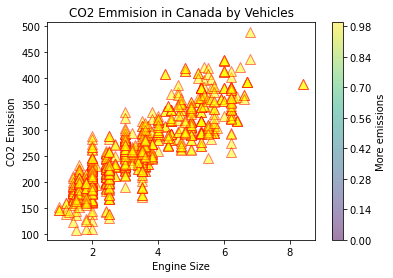

In [19]:
plt.scatter(eng_co2['ENGINESIZE'],eng_co2['CO2EMISSIONS'],  
            color      ='yellow', # for more colos see https://matplotlib.org/stable/gallery/color/named_colors.html
            edgecolor  = 'red', 
            linewidths = 1,
            marker ='^', # for more markers see https://matplotlib.org/stable/api/markers_api.html,
            s = 100, # marker size
            alpha = 0.5
            )

plt.colorbar(label="More emissions", 
             orientation="vertical", # or horizontal
             ticks = np.linspace(0, 70,500)
            )

plt.title("CO2 Emmision in Canada by Vehicles")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

plt.show()

### Spliting Dataset (Train & Test)

In [20]:
#  split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

# 80% for training
# 20% for testing

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
8,3.7,6,11.6,267
13,5.9,12,15.6,359
17,4.7,8,15.4,354
25,2.0,4,10.2,235
36,3.0,6,8.5,230


In [20]:
# length of dataset
len(df)

1067

### Train Data Distribution

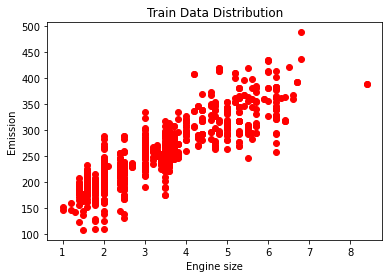

In [28]:
plt.scatter(train.ENGINESIZE, 
            train.CO2EMISSIONS,  
            color='red'
           )
plt.title('Train Data Distribution')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Modeling

In [29]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.72920786]]
Intercept:  [126.63887931]


### Plot outputs

Text(0, 0.5, 'Emission')

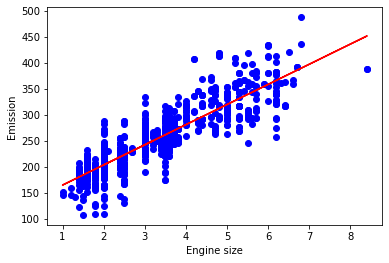

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='b')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Model Evaluation i.e MSE

* Mean Absolute Error (MAE): the easiest of the metrics to understand since it’s just average error.
* Mean Squared Error (MSE): it’s more popular than (MAE) because the focus is geared more towards large errors. 
* Root Mean Squared Error (RMSE).
* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. 

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.13
Residual sum of squares (MSE): 918.31
R2-score: 0.78


In [25]:
# Excersie

In [33]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

# print(train_x)
# print(test_x)

In [34]:
# Now train a Linear Regression Model using the train_x you created and the train_y created previously

regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

In [37]:
# Find the predictions using the model's predict function and the test_x data

predictions = regr.predict(test_x)
# predictions

In [38]:
# use the predictions & the test_y data and find the MAE value.

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

# We can see that the MAE is much worse when we train using ENGINESIZE than FUELCONSUMPTION_COMB.

Mean Absolute Error: 21.30
